## Explore the relationship between green space access and different health conditions

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [65]:
# load data
health = pd.read_csv('data/CitieSHealth_BCN_DATA_PanelStudy_20220414.csv')
health.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,bienestar,...,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,...,Universitario,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo menos que antes
4,135,22231,2020,11,12,3,22,Yes,12.0,9.0,...,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le doy más importancia que antes,No ha cambiado,NaN,NaN,Lo utilizo menos que antes,Lo utilizo más que antes


In [66]:
# The list of variables that we are intersted in
variables = ['access_greenbluespaces_300mbuff',
             'performance', 'estres', 'energia', 'sueno', 
             'horasfuera'] #'dieta', 'alcohol', 'drogas', 'enfermo', 'smoke', 'psycho',]

renamed_variables = {'access_greenbluespaces_300mbuff': 'access_greenblue_spaces',
                     'estres': 'stress_level', 'energia': 'energy_level',
                     'sueno':'sleep_quality', 'horasfuera': 'time _outdoors',
                     'dieta': 'diet', 'drogas':'drug_use', 'enfermo': 'illness'
                     }

health_clean = health.loc[:, variables].rename(columns = renamed_variables).dropna()

health_clean.head()

,access_greenblue_spaces,performance,stress_level,energy_level,sleep_quality,time _outdoors
1,Yes,51.240993,5.0,9.0,8.0,5.0
2,Yes,56.006067,8.0,5.0,9.0,8.0
3,Yes,58.177117,5.0,2.0,2.0,5.0
4,Yes,71.481757,6.0,9.0,2.0,22.0
6,No,46.047583,5.0,5.0,10.0,3.0


In [67]:
def ohe(data, column):
    enc = OneHotEncoder()
    enc.fit(data[column])
    encoded_data = pd.DataFrame(enc.transform(data[column]).toarray().astype(int))
    encoded_data.columns = enc.get_feature_names_out()
    encoded_data = encoded_data.set_index(data.index)
    return encoded_data

one_hot_health_clean = one_hot_encode(health_clean, ["access_greenblue_spaces"])
one_hot_health_clean.head()

,performance,stress_level,energy_level,sleep_quality,time _outdoors,access_greenblue_spaces_No,access_greenblue_spaces_Yes
1,51.240993,5.0,9.0,8.0,5.0,0.0,1.0
2,56.006067,8.0,5.0,9.0,8.0,0.0,1.0
3,58.177117,5.0,2.0,2.0,5.0,0.0,1.0
4,71.481757,6.0,9.0,2.0,22.0,0.0,1.0
6,46.047583,5.0,5.0,10.0,3.0,1.0,0.0


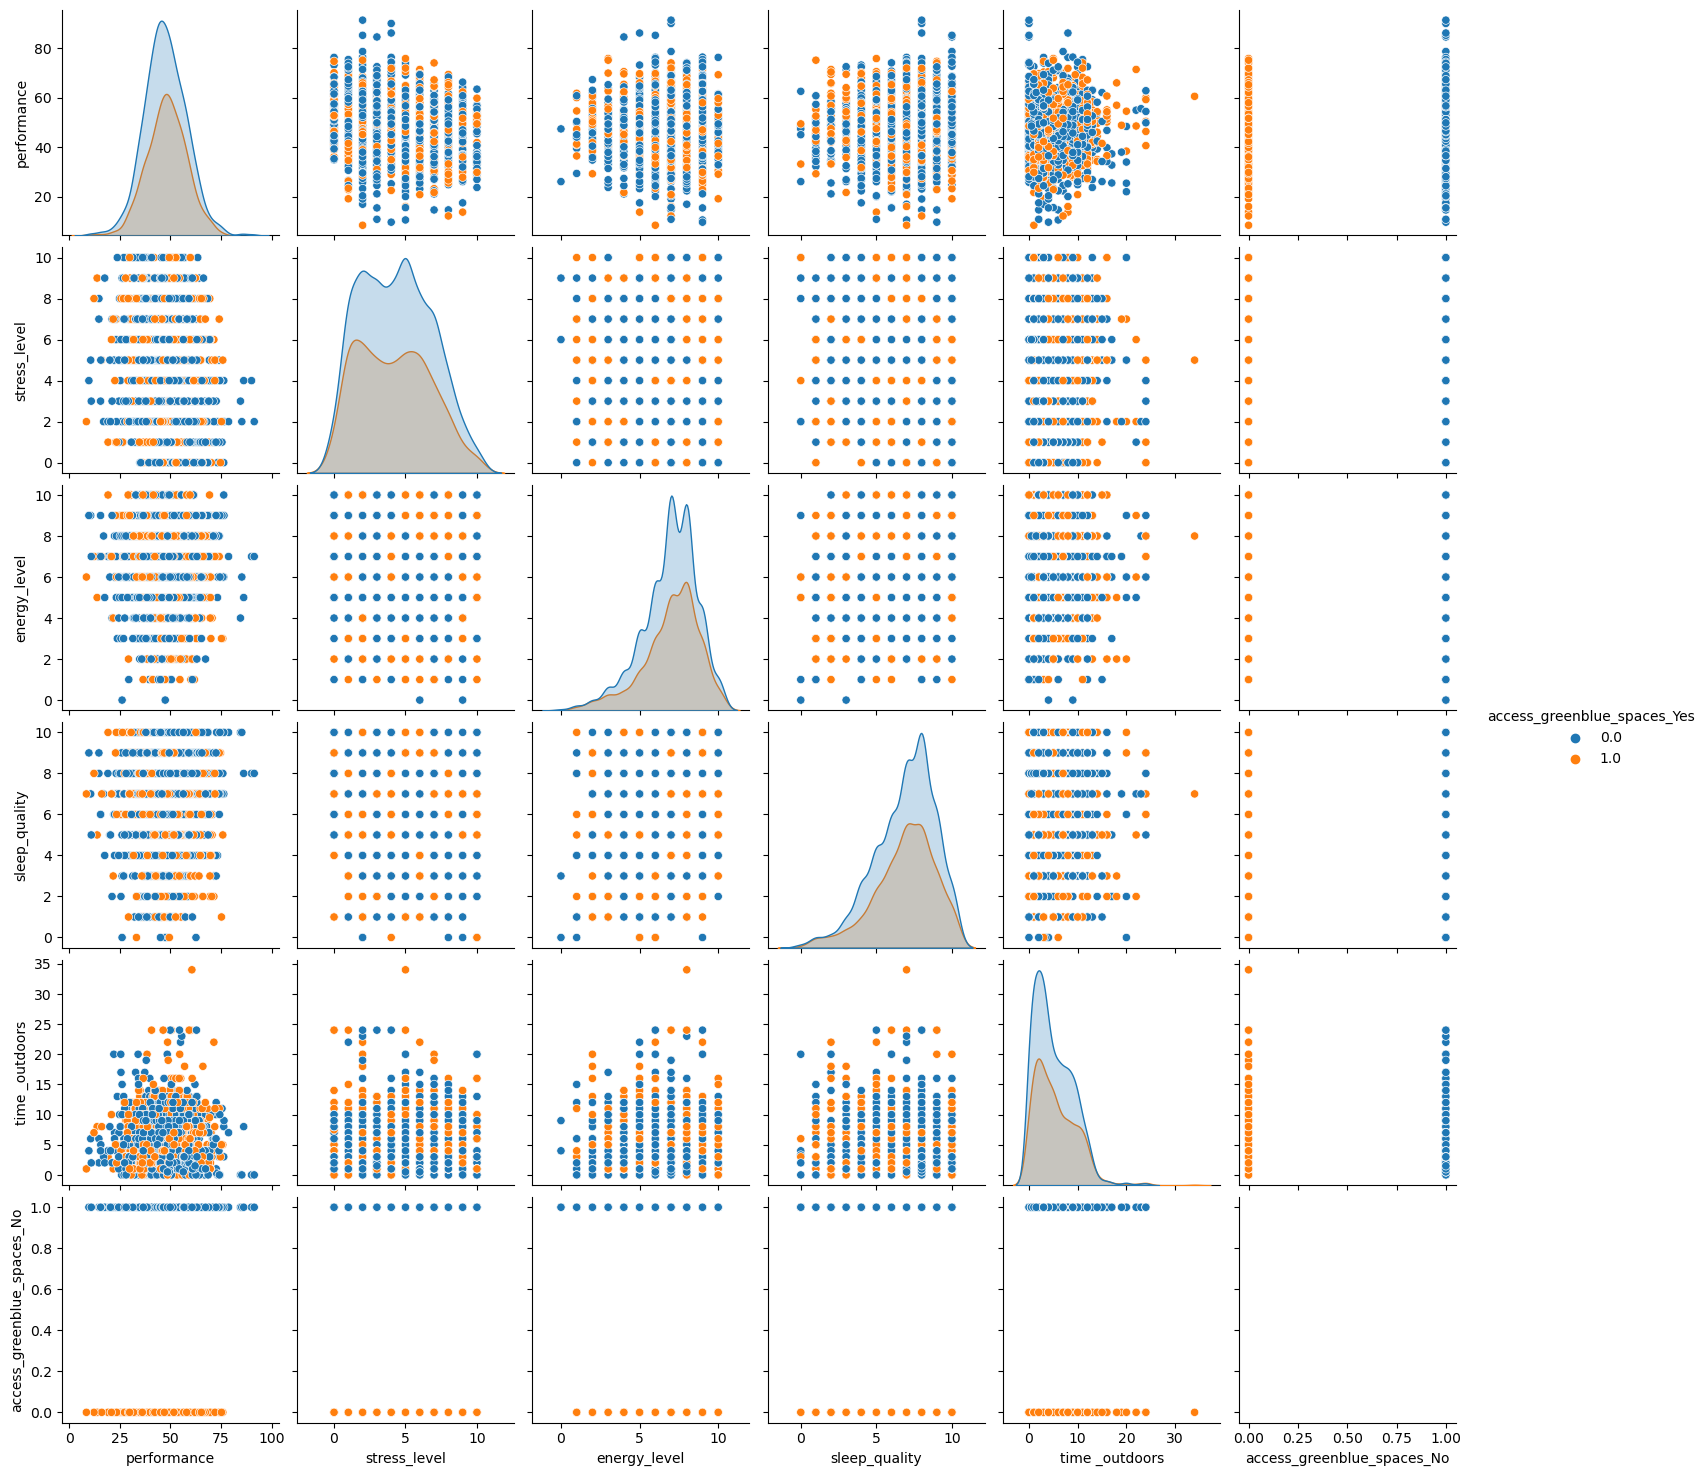

In [68]:
sns.pairplot(one_hot_health_clean, hue = "access_greenblue_spaces_Yes")

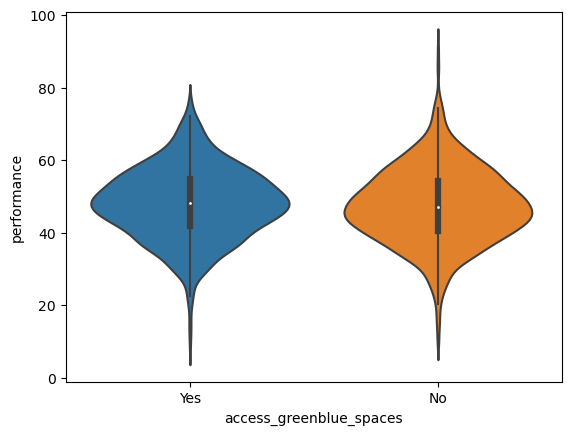

In [69]:
sns.violinplot(data = health_clean, y = 'performance', x = 'access_greenblue_spaces');

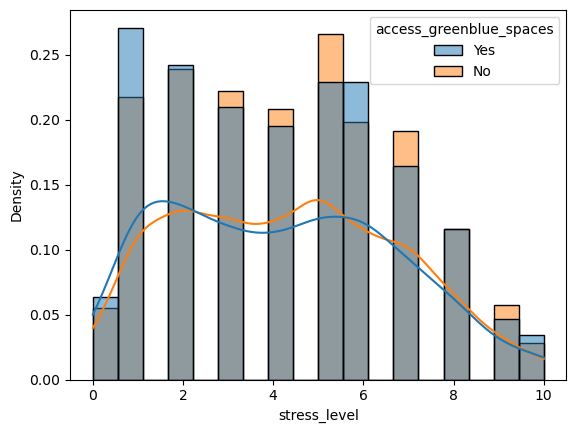

In [70]:
sns.histplot(data = health_clean, 
             x = 'stress_level', 
             hue = 'access_greenblue_spaces', 
             kde = True,
             stat = "density", 
             common_norm = False);

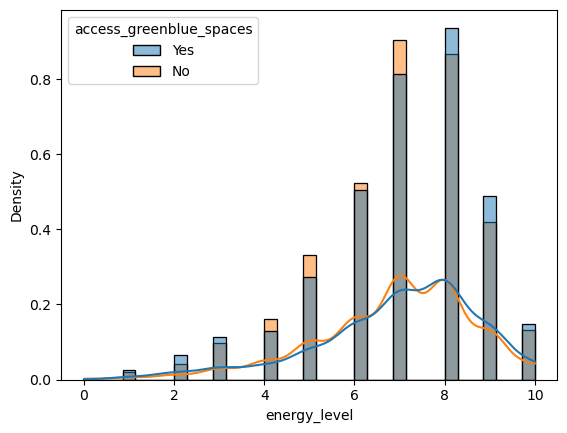

In [71]:
sns.histplot(data = health_clean, 
             x = 'energy_level', 
             hue = 'access_greenblue_spaces', 
             kde = True,
             stat = "density", 
             common_norm = False);	

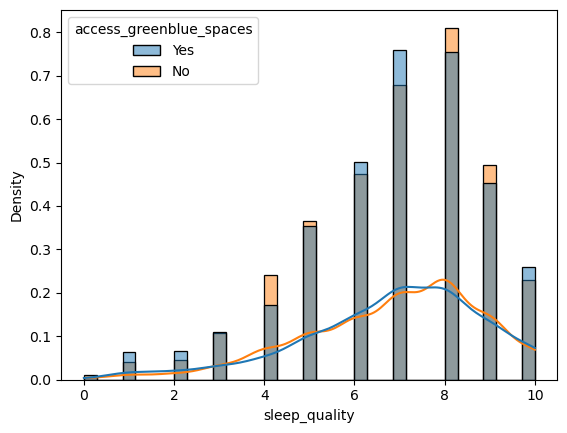

In [72]:
sns.histplot(data = health_clean, 
             x = 'sleep_quality', 
             hue = 'access_greenblue_spaces', 
             kde = True,
             stat = "density", 
             common_norm = False);

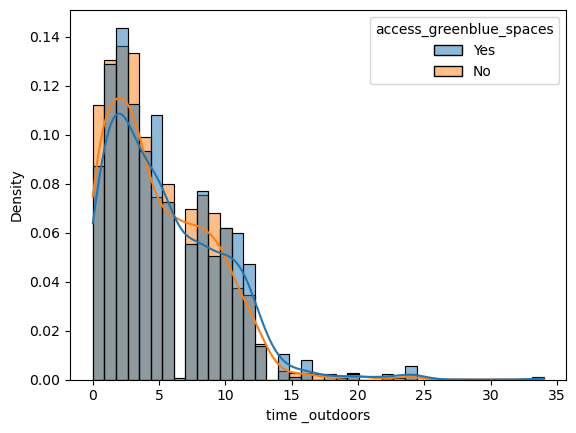

In [73]:
sns.histplot(data = health_clean, 
             x = 'time _outdoors', 
             hue = 'access_greenblue_spaces', 
             kde = True,
             stat = "density", 
             common_norm = False);